In [1]:
########################################
#損失関数の各種練習など
########################################

import numpy as np
import matplotlib.pyplot as plt

#テキストP88あたり

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0  , 0   ,   1,   0,    0,   0,   0,   0,   0,   0]

def sum_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2) # **2を使うと、各要素にブロードキャストできる！numpyの便利な性質

#試しに動かしてみる

#[2]を正解とする
#[2]の正解率が最も高い場合
print(sum_squared_error(np.array(y), np.array(t)))

#[7]の正解率が最も高い場合
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squared_error(np.array(y), np.array(t)))

#このように、２乗和誤差はニューラルネットと答えのズレが少なくなるほどに、数値が低くなっていく。


0.09750000000000003
0.5975


In [2]:
####################################
#交差エントロピーの学習
####################################

交差エントロピー誤差の数式
(書き方はこのページが参考になった)

https://qiita.com/namoshika/items/63db972bfd1030f8264a

$$
    E = - \sum_{k}^{}t_klogy_k \quad
$$

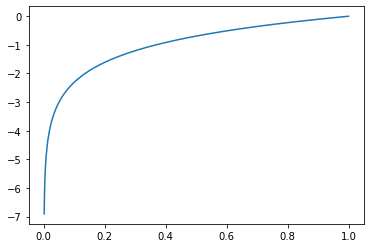

In [3]:
#まずは自然対数のグラフから

x = np.arange(0.001, 1, 0.0001) # 0から6まで0.1刻みで生成
y = np.log(x)

# グラフの描画
plt.plot(x, y)
plt.show()

In [4]:
##################################
# 交差エントロピー関数の実装
##################################

def cross_entropy_error(y, t):
    delta = 1e-7
    return - np.sum(t*np.log(y+delta)) #deltaを足すのはnp.log(0)による無限大回避策

#試しに動かしてみる
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0  , 0   ,   1,   0,    0,   0,   0,   0,   0,   0]

#[2]を正解とする
#[2]の正解率が最も高い場合
print(cross_entropy_error(np.array(y), np.array(t)))

#[7]の正解率が最も高い場合
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y), np.array(t)))

#交差エントロピの場合も２乗誤差和の時と同じように、誤差が低い時に低い値がでる。


0.510825457099338
2.302584092994546


In [9]:
#############################################################
#「ミニバッチ学習」の学習
#
# 全ての訓練データに対して、損失関数を計算するのではなく、
# 訓練データからランダムに取り出して、損失関数を計算することで、
# 大体、全体を近似する考え方
##############################################################

#テキストのP92あたりからスタート

import sys, os
import numpy as np

sys.path.append(os.pardir)

from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

#正解データはone hot表現になっている(one_hot_labelをTrueに指定したため)
print(t_train[0])

#ここで、おもむろにランダムチョイスのテストをしてみる
print("ランダムチョイスのテスト")
a = np.array([1,2,3,4,5,6,7,8,9,10])
print(a[[0,2,5,9]]) #想定どおり！

#これを上記、訓練データに適用して、ミニバッチをするとこうなる。
print("ミニバッチへのランダムチョイスの適用")

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size) # 0~train_size未満の数字の中からランダムにbatch_size個の数字を選び出す
#ランダムチョイスを使って、訓練データ（画像と、答え）を選び出す!
x_batch    = x_train[batch_mask]
t_batch    = t_train[batch_mask]



(60000, 784)
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
ランダムチョイスのテスト
[ 1  3  6 10]
